# Estimation of House Prices

In this notebook, we will perform a basic exploratory analysis of the **House Sales in King County, USA** dataset [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) to familiarize ourselves with the data and later apply machine learning techniques to it.

For each house, the following attributes (also known as features) are available:

| Attribute | Description |
| :- |:- |
| *id* | house identifier |
| *date* | date |
| *price* | price |
| *bedrooms* | number of bedrooms |
| *bathrooms* | number of bathrooms |
| *sqft_living* | living area size (in square feet) |
| *sqft_lot* | lot size (in square feet) |
| *floors* | number of floors |
| *waterfront* | indicates if the house has access to a lake |
| *view* | type of view (numeric variable) |
| *condition* | condition of the house (numeric variable) |
| *grade* | measure of the construction quality (numeric variable) |
| *sqft_above* | square footage above ground (in square feet) |
| *sqft_basement* | basement area size (in square feet) |
| *yr_built* | year the house was built |
| *yr_renovated* | year the house was renovated |
| *lat* | latitude of the lot |
| *long* | longitude of the lot |
| *sqft_living15* | average living area size of the 15 nearest neighbors |
| *sqft_lot15* | average lot size of the 15 nearest neighbors |

To represent the data, we are going to use *DataFrames* from [Pandas](http://pandas.pydata.org/). Pandas is an open-source library for the Python programming language and is one of the most commonly used for data analysis. It provides easy-to-use data structures for representing tabular data. As a basic reference guide, you can check the [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).


## 0.  Environment Configuration

In [18]:
# clone the rest of the repository if it is not available
import os
curr_dir = os.getcwd()
if not os.path.exists(os.path.join(curr_dir, '../.ROOT_DIR')):
    !git clone https://github.com/masdeseiscaracteres/ml_course.git ml_course
    os.chdir(os.path.join(curr_dir, 'ml_course/material'))

In [4]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import seaborn as sns

## 1. Data loading and cleaning

In [5]:
house_data = pd.read_csv("./data/kc_house_data.csv") # cargamos fichero (le permitimos inferir automáticamente el tipo de datos en cada columna)
house_data.head(5)                                   # visualize first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
# We show basic information about the data structure
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21568 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21568 non-null  float64
 1   bedrooms      21568 non-null  int64  
 2   bathrooms     21568 non-null  float64
 3   sqm_living    21568 non-null  float64
 4   sqm_lot       21568 non-null  float64
 5   floors        21568 non-null  float64
 6   waterfront    21568 non-null  int64  
 7   view          21568 non-null  int64  
 8   condition     21568 non-null  int64  
 9   grade         21568 non-null  int64  
 10  sqm_above     21568 non-null  float64
 11  sqm_basement  21568 non-null  float64
 12  yr_built      21568 non-null  int64  
 13  yr_renovated  21568 non-null  int64  
 14  zip_code      21568 non-null  int64  
 15  lat           21568 non-null  float64
 16  long          21568 non-null  float64
 17  sqm_living15  21568 non-null  float64
 18  sqm_lot15     21568 non-null  f

We can see that the data is represented as a DataFrame and consists of a total of 21,613 rows with data examples and 21 columns containing the variables associated with each example.

All variables are numeric (either integers, `int64`, or real numbers, `float64`) except for the `date` column. Remember that in the source file, which is a text file, all the data is represented as text. The function we used to load the data, `pd.read_csv`, was responsible for inferring the data type in each column and converting it to the appropriate type for our convenience. We must always ensure that the data is represented with the appropriate type. We can control the automatic inference mechanism or even disable it using some of the arguments to [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In this case, since all data types have been correctly inferred and are numeric, we don't need to code any columns for them to be used by the algorithms. On the other hand, the `id` and `date` attributes provide no information, so we discard them from the DataFrame.

In [7]:
# We eliminate the id and date columns
house_data = house_data.drop(['id','date'], axis=1)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Antes seguir con nuestro análisis, vamos a transformar las variables de superficie para expresarlas en metros cuadrados ($m^2$). Posteriormente, renombraremos las columnas.

In [8]:
# convert variables in square feet to square meters
feetFeatures = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# rename columns
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# visualize first rows
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509


In [9]:
# We convert the variable year of construction to years of age
house_data['years'] = pd.Timestamp('now').year - house_data['yr_built']
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,70
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,74
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,92
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,60
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,38


## 2. Exploratory Analysis

Now that we have the data we want to analyze loaded into a Pandas object, let's perform a basic analysis.

A good practice is to try to obtain as complete a statistical summary of the data as possible. We are usually interested in knowing the mean and standard deviation, the fraction of null values, the quartiles for each variable, etc. This will allow us, on the one hand, to get an idea of ​​the distributions of each variable and, on the other, will allow us to verify if there are any anomalous data, also known as outliers.

The `describe` method is useful for this task. If you want to perform a more comprehensive analysis, there are specific tools for this task, such as pandas-profiling.

In [10]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000e+00
sqm_living,21613.0,193.229008,85.325951,26.941882,132.572638,177.444806,236.902752,1.257907e+03
sqm_lot,21613.0,1403.483212,3848.091438,48.309581,468.231322,707.735359,992.947692,1.534163e+05
floors,21613.0,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000e+00
view,21613.0,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,1.300000e+01


Despite this summary, it's always a good idea to create graphical representations, which generally provide a better understanding of the data. To do this, let's plot histograms for some attributes: `bedrooms`, `sqm_living`, and `yr_built`.

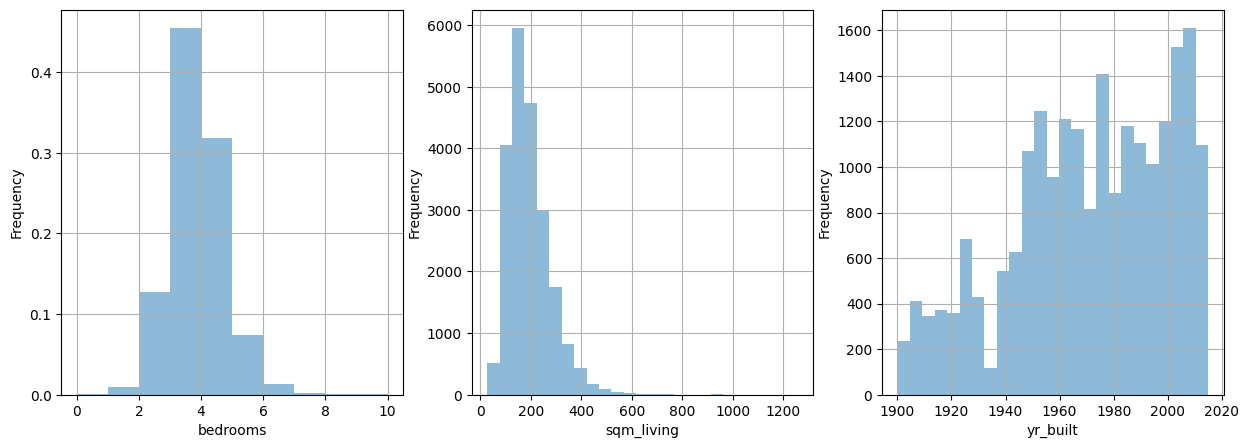

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
house_data['bedrooms'].plot.hist(alpha=0.5, bins=10, density=1, range = [0,10], grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
house_data['sqm_living'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('sqm_living')

plt.subplot(1,3,3)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')

plt.show()

Once we have analyzed the variables separately, the next step in an exploratory analysis would be to understand the relationships between each of the variables/attributes ($\mathbf{x}$) and the target variable ($y$).

To do this, we will use a scatter plot with the target variable, $y$, as the dependent variable and one of the explanatory variables as independent variables. In the case of the variable *waterfront*, since it is binary, we will use a box plot.

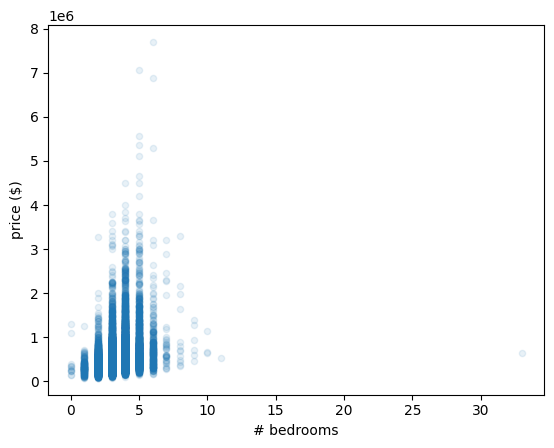

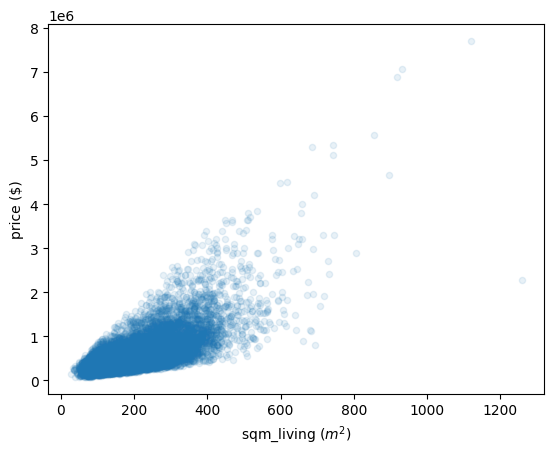

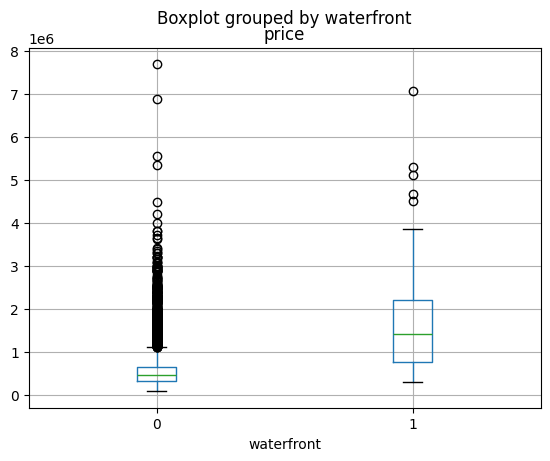

In [12]:
# We only represent 3 variables: bedrooms, sqm_living, and waterfront
# The rest can be repeated one by one
# Using transparency (alpha) can be useful to appreciate the density of the data

house_data.plot(kind = 'scatter', x='bedrooms', y = 'price', alpha=0.1)
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter', x='sqm_living', y = 'price', alpha=0.1)
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

house_data.boxplot(by='waterfront', column = 'price')
plt.show()

In [13]:
# For the moment we are going to focus on homes under 600 m^2
sel = house_data.sqm_living <= 600

print(house_data.shape)
house_data = house_data[sel]
print(house_data.shape)
house_data.head()

(21613, 20)
(21568, 20)


,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,70
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,74
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,92
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,60
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,38


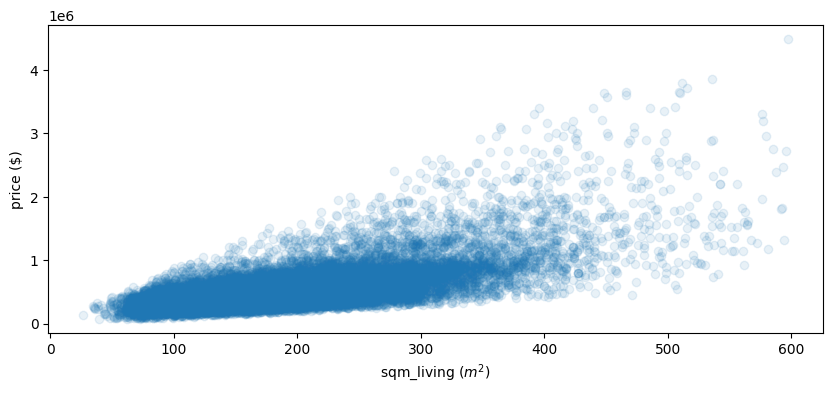

In [14]:
plt.figure(figsize = (10,4))
plt.scatter(house_data.sqm_living, house_data.price, alpha=0.1)
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

Once we have performed an initial exploratory analysis, the next step is to evaluate the correlations between the different variables in the problem. This can often help us identify potential attributes that are highly correlated.

If the correlation between two attributes is very high, the attribute matrix is ​​said to be singular, and, as we have seen, this is a major source of error in some machine learning algorithms, such as linear regression.

This problem is called collinearity. To address it, the correlation coefficient ($\rho$) between the different attributes is typically evaluated, discarding those with a $\rho$ value above a threshold we establish a priori ($|\rho|>0.9$, for example). It should be noted that $-1<\rho<1$, so that values ​​close to $0$ indicate no correlation and values ​​close to $1$ or $-1$ indicate a high correlation.

We calculate the correlation matrix:

In [15]:
house_data.corr() # correlation matrix

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
price,1.000000,0.305467,0.510356,0.684604,0.083145,0.262169,0.247350,0.392966,0.042095,0.671409,0.588258,0.298468,0.052127,0.122914,-0.049883,0.324528,0.021261,0.593884,0.075660,-0.052127
bedrooms,0.305467,1.000000,0.511765,0.579499,0.026752,0.172023,-0.011400,0.072633,0.029003,0.350153,0.474325,0.296342,0.153713,0.017091,-0.152505,-0.010176,0.129362,0.386856,0.024290,-0.153713
bathrooms,0.510356,0.511765,1.000000,0.746721,0.074433,0.503544,0.053973,0.173805,-0.125079,0.656742,0.674477,0.264786,0.511900,0.046528,-0.204648,0.022335,0.224613,0.563599,0.074308,-0.511900
sqm_living,0.684604,0.579499,0.746721,1.000000,0.160094,0.356643,0.086397,0.268373,-0.057879,0.759194,0.870697,0.414826,0.325398,0.049725,-0.202541,0.050445,0.245538,0.760903,0.172612,-0.325398
sqm_lot,0.083145,0.026752,0.074433,0.160094,1.000000,-0.008758,0.021497,0.069010,-0.007361,0.105247,0.170983,0.007967,0.050227,0.007906,-0.129621,-0.088530,0.227516,0.141735,0.710688,-0.050227
floors,0.262169,0.172023,0.503544,0.356643,-0.008758,1.000000,0.022365,0.025270,-0.264077,0.457993,0.529278,-0.256756,0.490111,0.005919,-0.058788,0.048890,0.125187,0.277886,-0.015700,-0.490111
waterfront,0.247350,-0.011400,0.053973,0.086397,0.021497,0.022365,1.000000,0.397969,0.017714,0.072988,0.059691,0.064580,-0.028753,0.090649,0.032856,-0.016406,-0.043490,0.079992,0.031661,0.028753
view,0.392966,0.072633,0.173805,0.268373,0.069010,0.025270,0.397969,1.000000,0.047538,0.240091,0.150698,0.264835,-0.057374,0.102816,0.087889,0.004704,-0.081772,0.272370,0.066325,0.057374
condition,0.042095,0.029003,-0.125079,-0.057879,-0.007361,-0.264077,0.017714,0.047538,1.000000,-0.144777,-0.159507,0.177854,-0.361132,-0.060796,0.002706,-0.014816,-0.106153,-0.092733,-0.001855,0.361132
grade,0.671409,0.350153,0.656742,0.759194,0.105247,0.457993,0.072988,0.240091,-0.144777,1.000000,0.750542,0.149324,0.449633,0.010811,-0.184700,0.113240,0.198580,0.709924,0.112344,-0.449633


We plot the absolute value of the correlations to identify at a glance the most collinear variables.

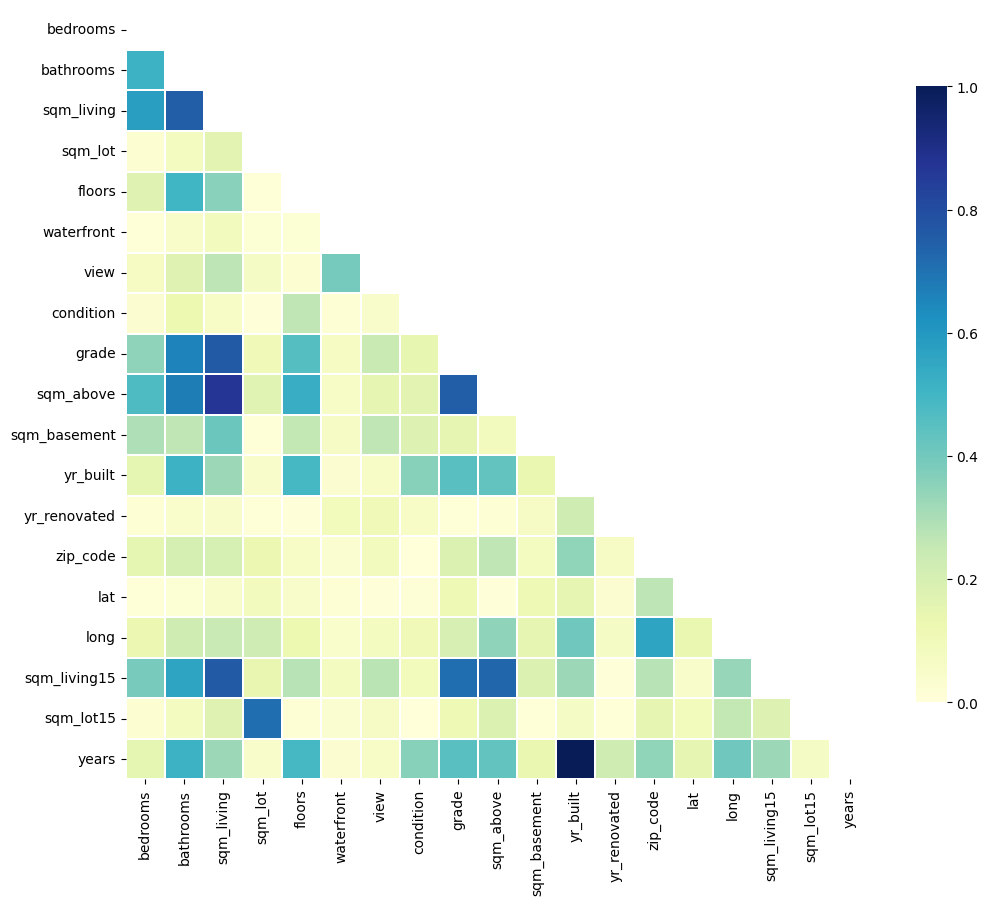

In [20]:
# Compute the correlation matrix
corr = np.abs(house_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Changed np.bool to bool
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


Another alternative is to create a scatter plot of all the variables against each other to get an idea of ​​how the problem's variables relate to each other. It's also advisable to visualize the distribution of each variable at the same time.Otra alternativa es hacer un *scatter plot* de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema. También es recomendable visualizar al mismo tiempo la distribución de cada una de las variables.

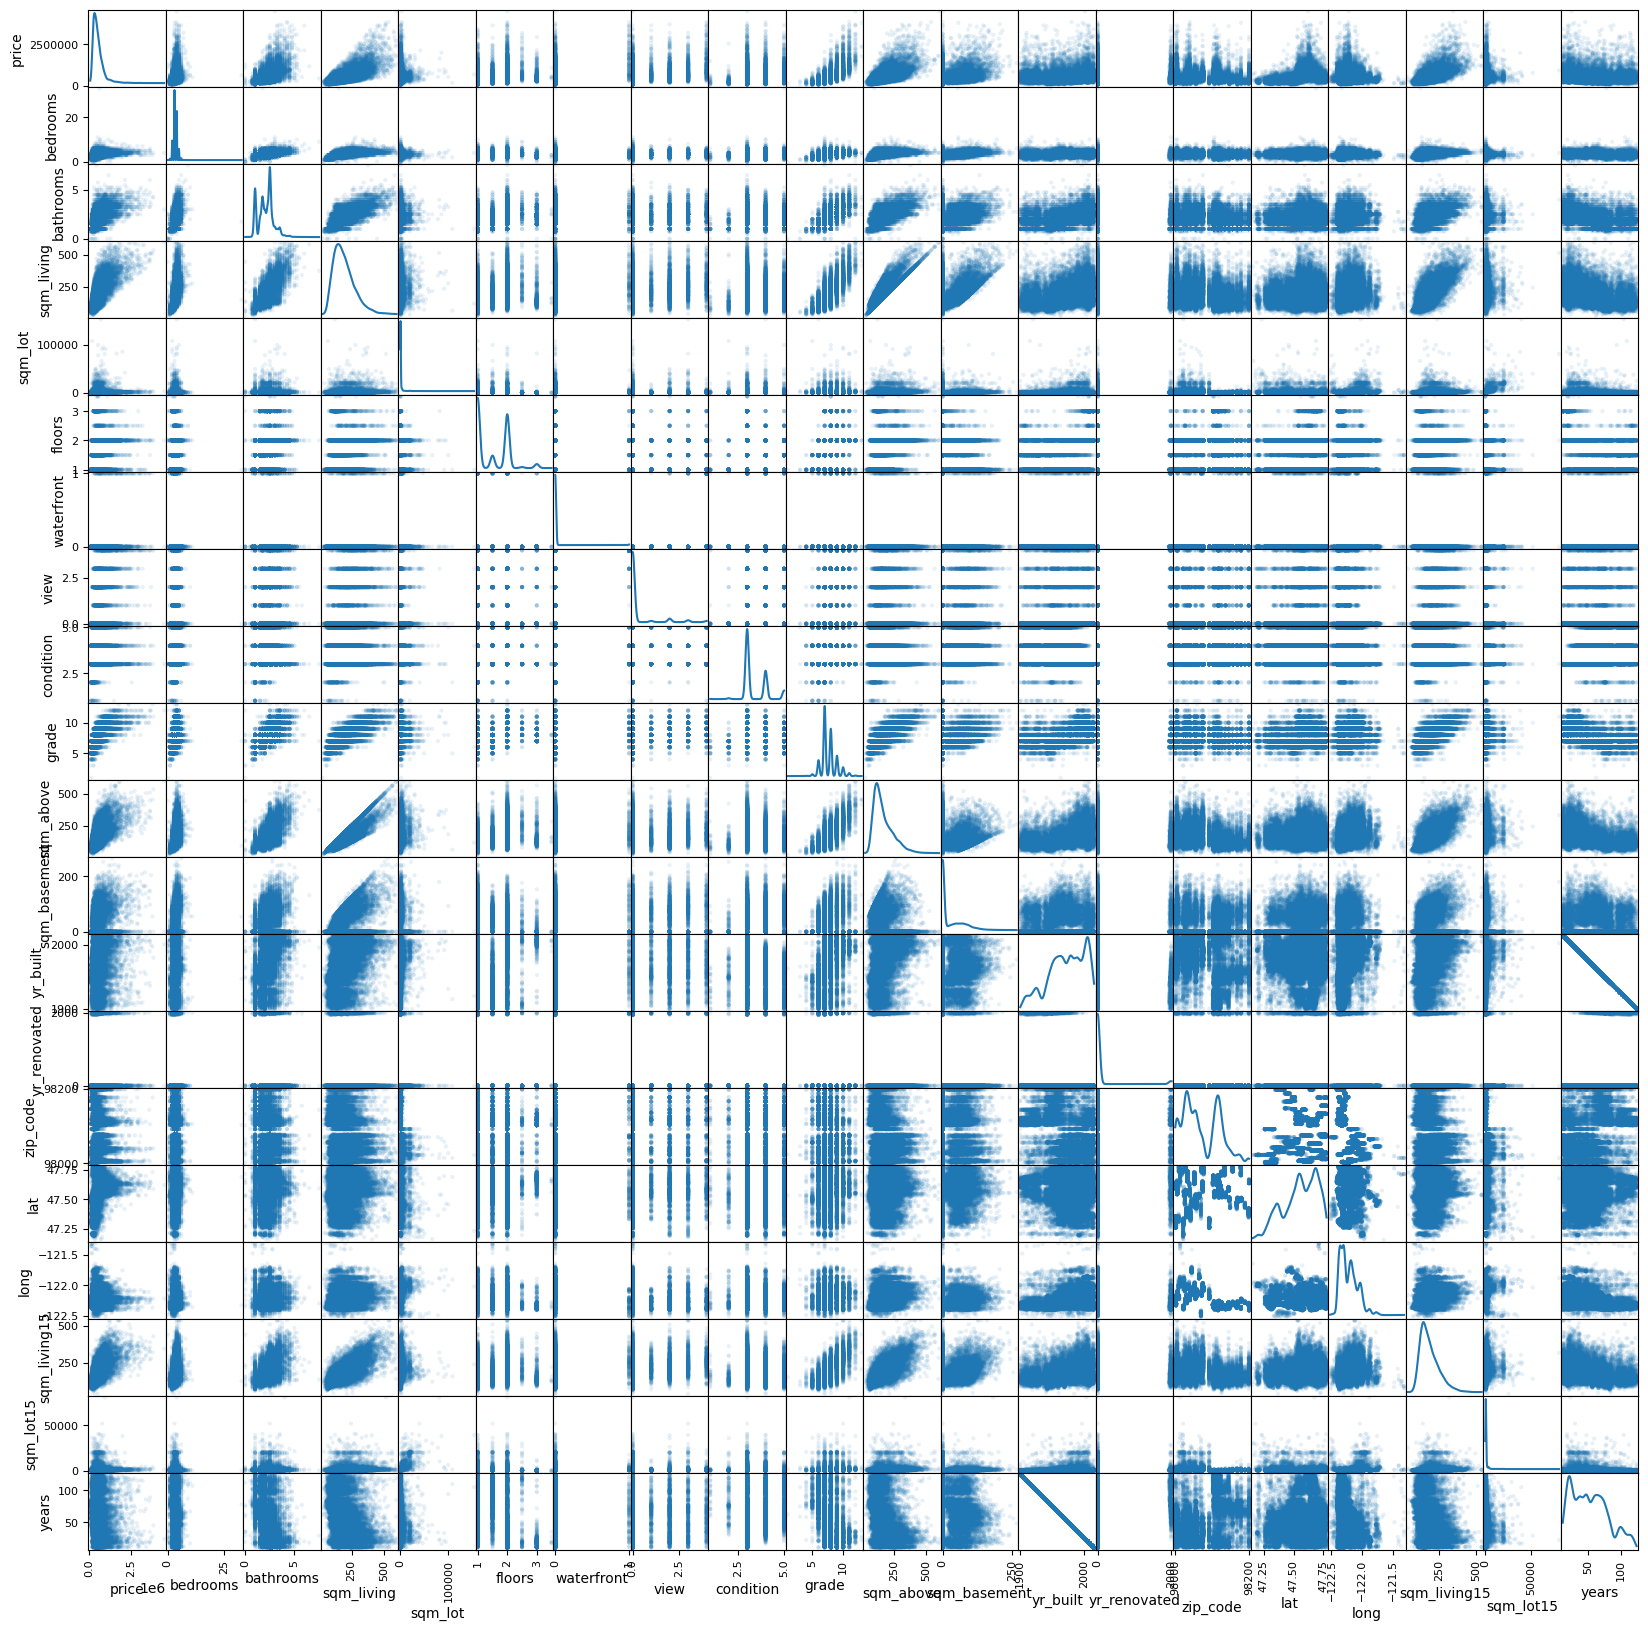

In [17]:
pd.plotting.scatter_matrix(house_data, alpha=0.1, figsize=(20, 20), diagonal = 'kde')
plt.show()

Once we have this information, it's time to consider other variables that make sense and eliminate variables with high correlation. Some examples:

- Delete sqm_living or sqm_above.
- Use the house age attribute, years, instead of the year of construction, yr_built.